In [39]:
import pypsa
network = pypsa.Network()

In [40]:
n_buses = 3
for i in range(n_buses):
    network.add('Bus',f'My bus {str(i)}', v_nom = 20.0)

In [41]:
for i in range(n_buses):
    network.add("Line", "My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%3),
                x=0.1,
                r=0.01)

In [42]:
#add a generator at bus 0
network.add("Generator", "My gen",
            bus="My bus 0",
            p_set=100,
            control="PQ")


#add a load at bus 1
network.add("Load", "My load",
            bus="My bus 1",
            p_set=100,
            q_set=100)

Index(['My load'], dtype='object')

In [43]:
network

PyPSA Network 'Unnamed Network'
-------------------------------
Components:
 - Bus: 3
 - Generator: 1
 - Line: 3
 - Load: 1
Snapshots: 1

In [44]:
network.pf()

INFO:pypsa.network.power_flow:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x0000020D1BA04B90> for snapshots Index(['now'], dtype='object', name='snapshot')


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         4.753531e-10,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [47]:
network.lines_t.p0

,My line 0,My line 1,My line 2
snapshot,,,
now,66.897487,-33.333333,-33.391038


In [48]:
import numpy as np
network.buses_t.v_ang * 180 / np.pi

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,0.0,-0.875939,-0.433813


In [49]:
network.buses_t.v_mag_pu


Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,1.0,0.981199,0.99057


In [11]:
import matplotlib.pyplot as plt
network = pypsa.examples.ac_dc_meshed(from_master=True)

C:\Users\EAFar\AppData\Local\Temp\ipykernel_23636\27717887.py:2: DeprecationWarning:

The 'update' 'from_master' and 'remove_link_p_set' parameters are deprecated and do not have any effect. Example networks are always updated and retrieved for the current version.Deprecated in version 0.35 and will be removed in version 1.0.

INFO:pypsa.network.io:Retrieving network data from https://github.com/PyPSA/PyPSA/raw/v0.35.2/examples/networks/ac-dc-meshed/ac-dc-meshed.nc.
INFO:pypsa.network.io:Imported network 'AC-DC-Meshed' has buses, carriers, generators, global_constraints, lines, links, loads


In [12]:
# get current type (AC or DC) of the lines from the buses
lines_current_type = network.lines.bus0.map(network.buses.carrier)
lines_current_type

Line
0    AC
1    AC
2    DC
3    DC
4    DC
5    AC
6    AC
Name: bus0, dtype: object

C:\Users\EAFar\AppData\Local\Temp\ipykernel_23636\1053005155.py:1: DeprecatedWarning:

plot is deprecated as of 0.34 and will be removed in 1.0. Use `n.plot.map()` as a drop-in replacement instead.

C:\Users\EAFar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\io\__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip

C:\Users\EAFar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\io\__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip



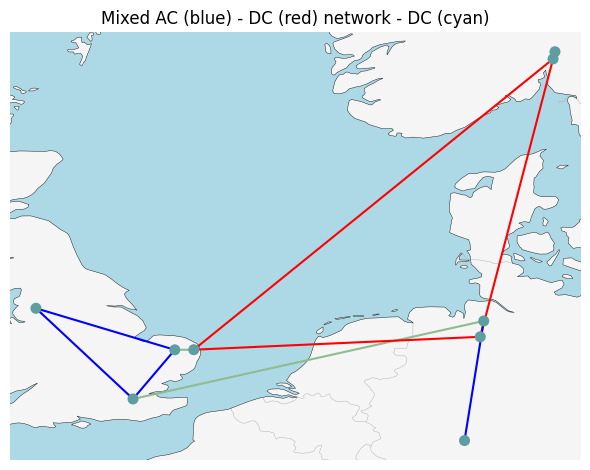

In [13]:
network.plot(
    line_colors=lines_current_type.map(lambda ct: "r" if ct == "DC" else "b"),
    title="Mixed AC (blue) - DC (red) network - DC (cyan)",
    color_geomap=True,
    jitter=0.3,
)
plt.tight_layout()

In [14]:
network.links.loc["Norwich Converter", "p_nom_extendable"] = False

In [15]:
network.determine_network_topology()
network.sub_networks["n_branches"] = [
    len(sn.branches()) for sn in network.sub_networks.obj
]
network.sub_networks["n_buses"] = [len(sn.buses()) for sn in network.sub_networks.obj]

network.sub_networks

,carrier,slack_bus,obj,n_branches,n_buses
SubNetwork,,,,,
0,AC,Manchester,<pypsa.networks.SubNetwork object at 0x0000020...,3,3
1,DC,Norwich DC,<pypsa.networks.SubNetwork object at 0x0000020...,3,3
2,AC,Frankfurt,<pypsa.networks.SubNetwork object at 0x0000020...,1,2
3,AC,Norway,<pypsa.networks.SubNetwork object at 0x0000020...,0,1


In [16]:
network.snapshots

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00'],
              dtype='datetime64[ns]', name='snapshot', freq=None)

In [28]:
network.generators_t.marginal_cost_quadratic


Generator
snapshot
2015-01-01 00:00:00
2015-01-01 01:00:00
2015-01-01 02:00:00
2015-01-01 03:00:00
2015-01-01 04:00:00
2015-01-01 05:00:00
2015-01-01 06:00:00
2015-01-01 07:00:00
2015-01-01 08:00:00


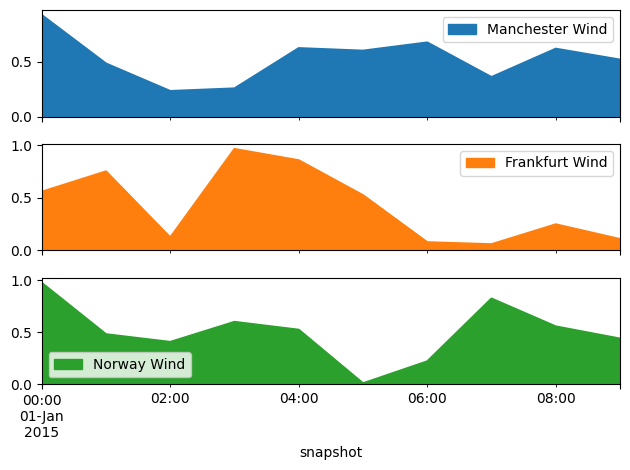

In [18]:
network.generators_t.p_max_pu.plot.area(subplots=True)
plt.tight_layout()


In [29]:
network.optimize();

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.07s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 187 primals, 467 duals
Objective: -3.47e+06
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-ext-p-lower, Generator-ext-p-upper, Line-ext-s-lower, Line-ext-s-upper, Link-fix-p-lower, Link-fix-p-upper, Link-ext-p-lower, Link-ext-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


In [30]:
network.objective

-3474094.1308449395

In [31]:
network.objective + network.objective_constant

np.float64(18440973.387434203)

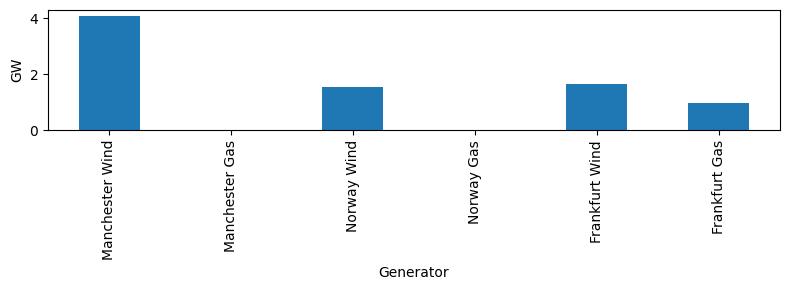

In [32]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()

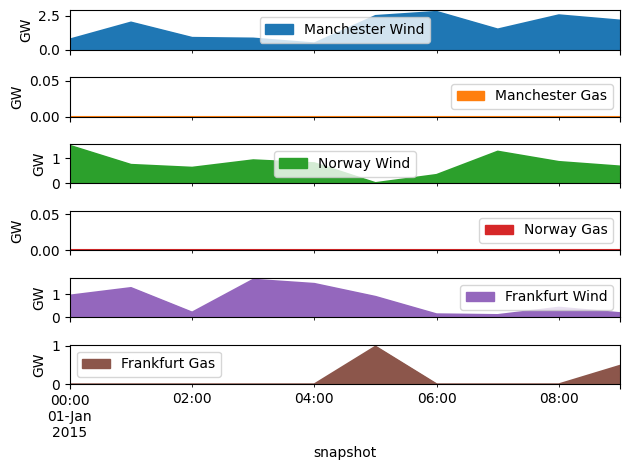

In [33]:
network.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW")
plt.tight_layout()

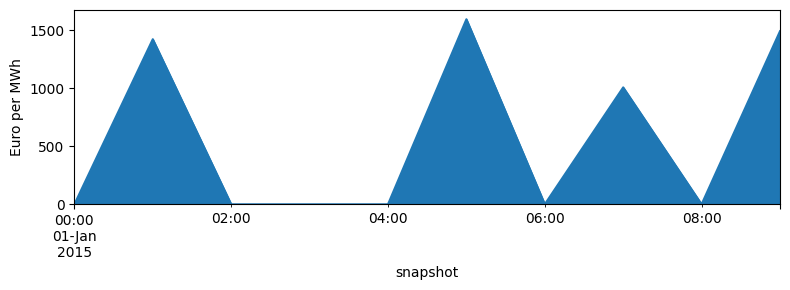

In [34]:
network.buses_t.marginal_price.mean(1).plot.area(figsize=(8, 3), ylabel="Euro per MWh")
plt.tight_layout()

In [38]:
network.buses_t.p


Bus,London,Norwich,Norwich DC,Manchester,Bremen,Bremen DC,Frankfurt,Norway,Norway DC
snapshot,,,,,,,,,
2015-01-01 00:00:00,282.201747,-164.621247,-250.841318,-117.580500,-534.340860,-423.743508,534.340860,0.000000e+00,674.584826
2015-01-01 01:00:00,-658.826571,-577.674757,315.068611,1236.501328,-823.210906,-198.341419,823.210906,2.000888e-10,-116.727192
2015-01-01 02:00:00,67.410679,-769.237972,350.761618,701.827293,173.898185,-932.732306,-173.898185,0.000000e+00,581.970687
2015-01-01 03:00:00,187.244846,-467.187392,-85.772148,279.942546,-743.788495,-186.785801,743.788495,-1.000444e-10,272.557949
2015-01-01 04:00:00,166.897822,-535.526579,317.366721,368.628757,-883.817538,-237.617234,883.817538,3.999503e-10,-79.749487
2015-01-01 05:00:00,-613.859061,-1178.723892,386.747627,1792.582954,-1030.848768,107.450090,1030.848768,3.999503e-10,-494.197717
2015-01-01 06:00:00,-607.846278,-1431.870681,900.000000,2039.716959,319.386680,-642.479280,-319.386680,2.999059e-10,-257.520720
2015-01-01 07:00:00,-777.484580,-147.190786,123.677319,924.675366,600.728881,-1095.596165,-600.728881,-3.999503e-10,971.918845
2015-01-01 08:00:00,-1007.575254,-1214.774896,244.715828,2222.350150,501.346379,-1095.596165,-501.346379,0.000000e+00,850.880337
